In [1]:
import pandas as pd

train_data = pd.read_csv('store_sales/train.csv')
train_data["date"] = pd.to_datetime(train_data["date"])
# train_data = train_data.set_index('id')
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [2]:
holidays_data = pd.read_csv('store_sales/holidays_events.csv')
holidays_data["date"] = pd.to_datetime(holidays_data["date"])
holidays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [3]:
transactions_data = pd.read_csv('store_sales/transactions.csv')
transactions_data['date'] = pd.to_datetime(transactions_data['date'])
transactions_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [4]:
stores_data = pd.read_csv('store_sales/stores.csv')
stores_data

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


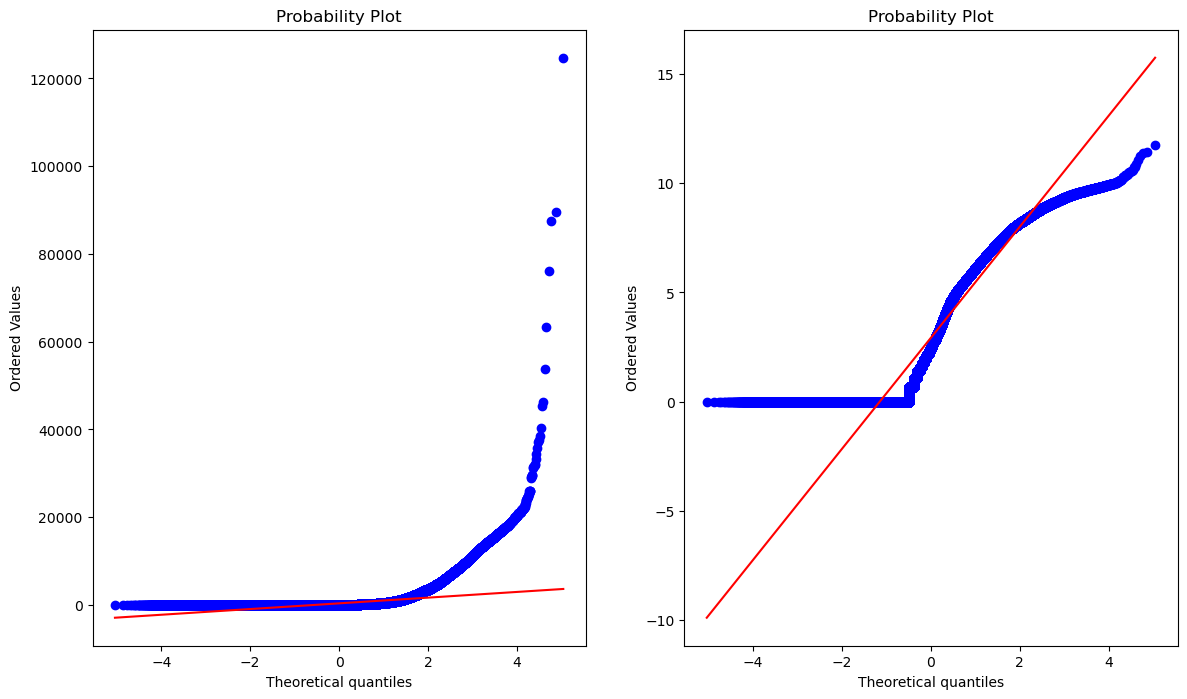

In [5]:
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (14,8))

# Распределение на необработанных данных
fig.add_subplot(1,2,1)
res = stats.probplot(train_data['sales'], plot=plt)

# Распределение при условии, что мы прологарифмировали 'SalePrice'
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train_data['sales']), plot=plt)

In [6]:
train_data['sales'] = np.log1p(train_data['sales'])

In [7]:
sales_per_store = train_data.groupby(['date', 'store_nbr']).agg({'sales': 'sum'}).unstack().resample('1M').sum()

Text(0.5, 1.0, 'Sales per month for each store')

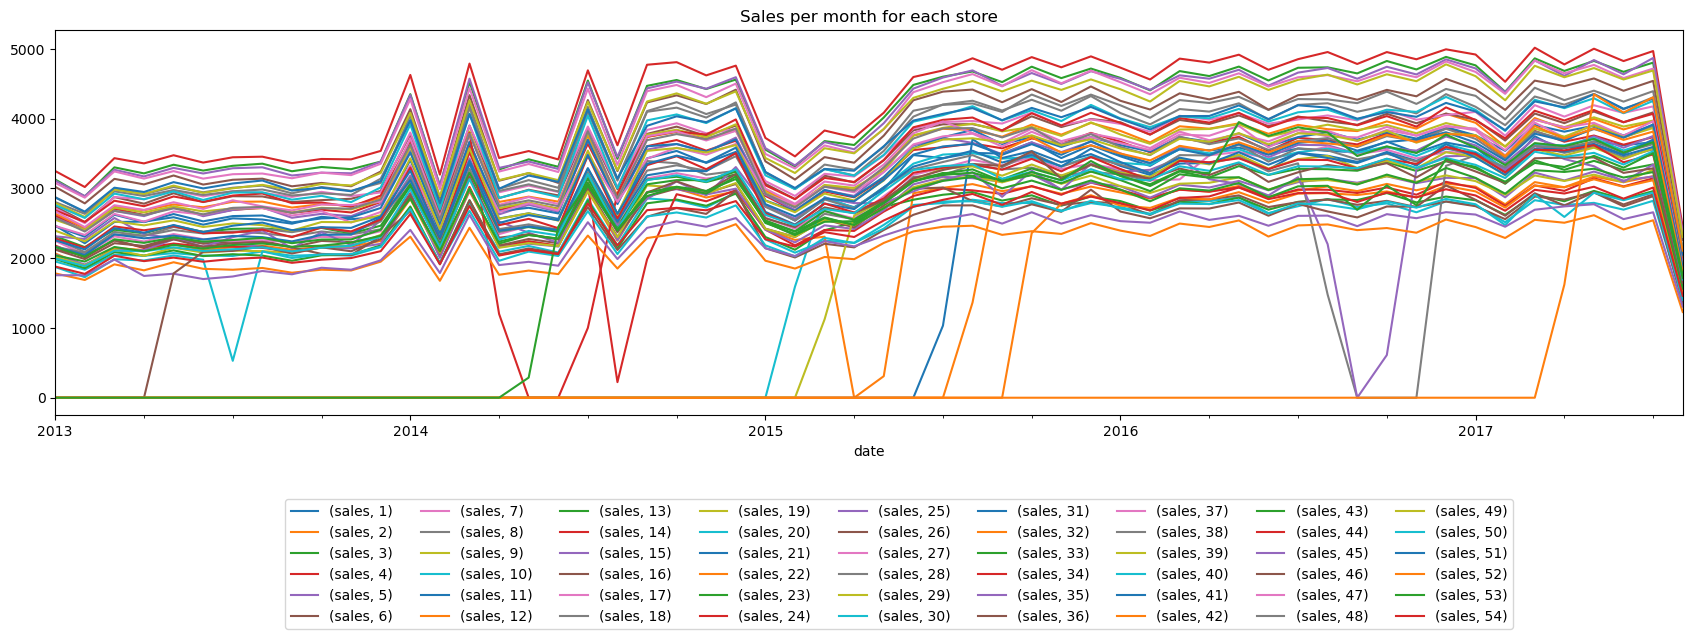

In [8]:
sales_per_store.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=9)
plt.title("Sales per month for each store")

In [9]:
family_sales_per_month = train_data.groupby(['date', 'family']).agg({'sales': 'sum'}).unstack().resample('1M').sum()

Text(0.5, 1.0, 'Sales per month for product family')

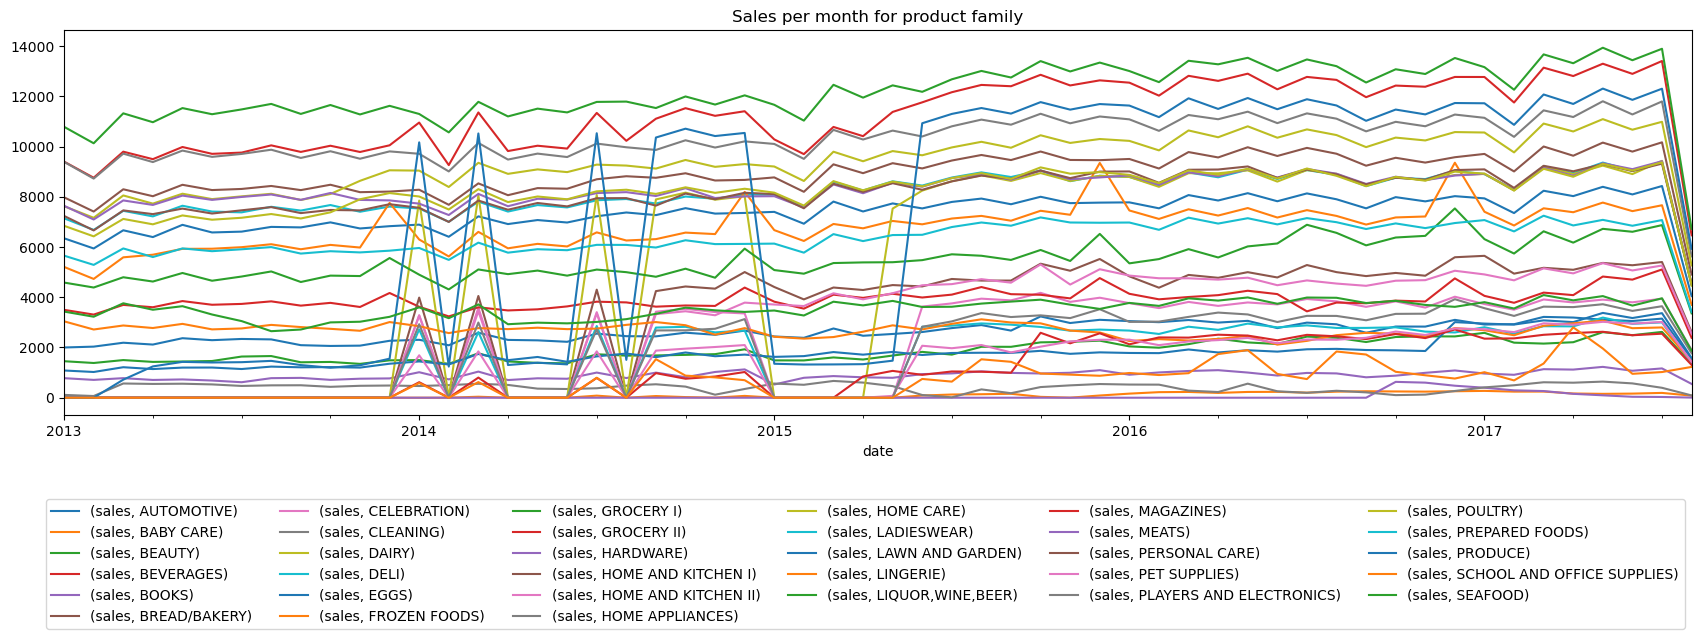

In [10]:
family_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Sales per month for product family")

In [11]:
oil_data = pd.read_csv('store_sales/oil.csv')

In [12]:
oil_data.fillna(method = 'ffill', inplace = True)
oil_data['date'] = pd.to_datetime(oil_data['date'])

Text(0.5, 1.0, 'Oil price')

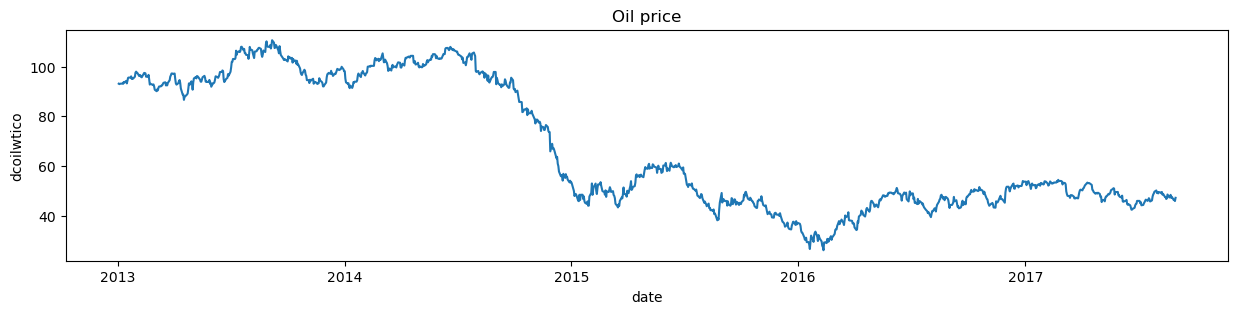

In [13]:
import seaborn as sns

plt.figure(figsize =(15, 3))
sns.lineplot(data=oil_data, x = 'date', y = 'dcoilwtico')
plt.title('Oil price')

In [14]:
store_sales = pd.read_csv(
        'store_sales/train.csv',
        usecols=['store_nbr', 'family', 'date', 'sales'],
        dtype={
            'store_nbr': 'category',
            'family': 'category',
            'sales': 'float32',
        },
        parse_dates=['date'],
        infer_datetime_format=True,
    )

store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
store_sales

sales
store_nbr family     date                 
1         AUTOMOTIVE 2013-01-01   0.000000
                     2013-01-02   2.000000
                     2013-01-03   3.000000
                     2013-01-04   3.000000
                     2013-01-05   5.000000
...                                    ...
9         SEAFOOD    2017-08-11  23.830999
                     2017-08-12  16.859001
                     2017-08-13  20.000000
                     2017-08-14  17.000000
                     2017-08-15  16.000000

[3000888 rows x 1 columns]

In [15]:
average_sales = store_sales.groupby('date').mean().squeeze().loc['2017']
average_sales

date
2017-01-01      6.780303
2017-01-02    786.928406
2017-01-03    619.740234
2017-01-04    555.608032
2017-01-05    436.375397
                 ...    
2017-08-11    463.733856
2017-08-12    444.798279
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 227, dtype: float32

In [16]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

y = average_sales.copy()
fourier = CalendarFourier(freq="M", order = 4)

dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X = dp.in_sample()

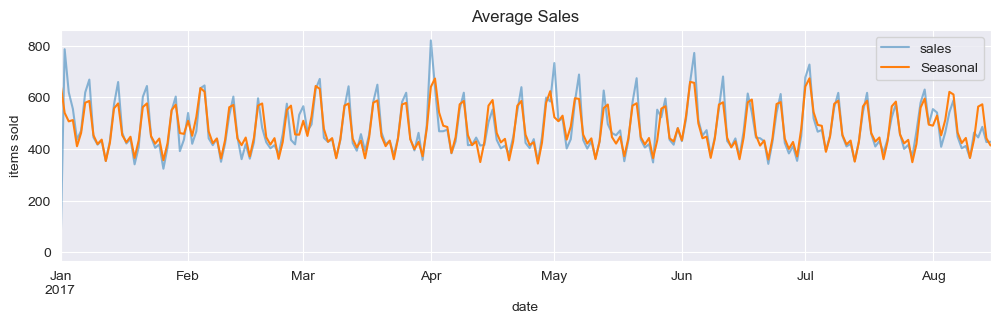

In [17]:
from sklearn.linear_model import LinearRegression,  Lasso, Ridge, ElasticNet

sns.set_style('darkgrid')
plt.figure(figsize =(12, 3))

model = LinearRegression().fit(X, y)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

In [18]:
y

date
2017-01-01      6.780303
2017-01-02    786.928406
2017-01-03    619.740234
2017-01-04    555.608032
2017-01-05    436.375397
                 ...    
2017-08-11    463.733856
2017-08-12    444.798279
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 227, dtype: float32

<AxesSubplot:title={'center':'y_deseason'}, xlabel='date', ylabel='Deseasonalized'>

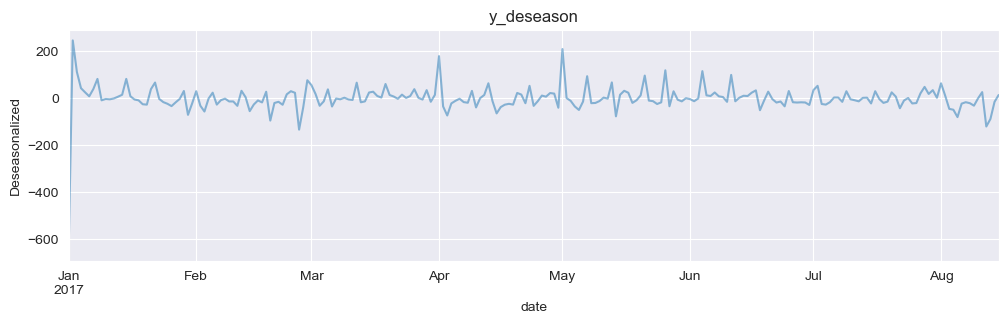

In [19]:
y_deseason = y - y_pred


plt.figure(figsize =(12, 3))
ax = y_deseason.plot(alpha=0.5, title="y_deseason", ylabel="Deseasonalized")
ax

In [20]:
holidays_events = pd.read_csv(
    'store_sales/holidays_events.csv',
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
holidays_events = holidays_events.set_index('date').to_period('D')
holidays = (
    holidays_events
    .query("locale in ['National', 'Regional']")
    .loc['2017':'2017-08-15', ['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
)

holidays

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-01,Provincializacion de Cotopaxi
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre


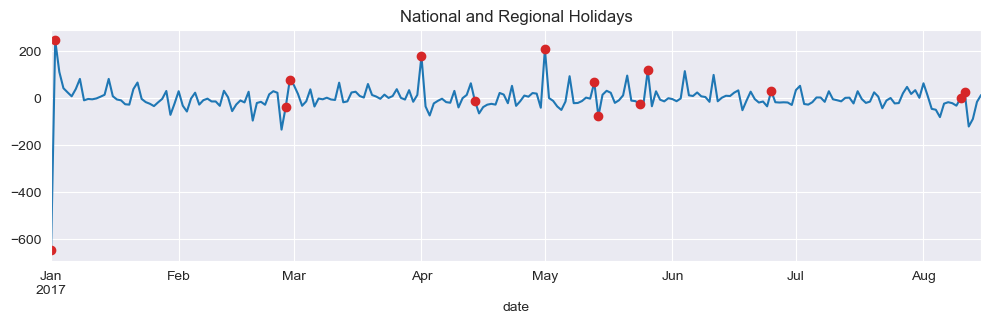

In [21]:
plt.figure(figsize =(12, 3))

ax = y_deseason.plot()
plt.plot_date(holidays.index, y_deseason[holidays.index], color='C3')
ax.set_title('National and Regional Holidays');

In [22]:
def lag_features(df, lags):
    for lag in lags:
        df[f"sales_t-{lag}"] = df.groupby(["store_nbr", "family"])["sales"].transform(
            lambda x: x.shift(lag))
    return df

def roll_mean_features(df, windows):
    for window in windows:
        df['sales_roll_mean_' + str(window)] = df.groupby(["store_nbr", "family"])['sales']. \
                                                          transform(
            lambda x: x.shift(16).rolling(window=window, min_periods=7, win_type="triang").mean()) + random_noise(
            df)
    return df

def random_noise(df):
    return np.random.normal(scale=2.0, size=(len(df),))

def ewm_features(df, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            df['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                df.groupby(["store_nbr", "family"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return df

def create_date_features(df):
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df['year'] = df.date.dt.year
    return df

def fill_na(df):
    df['holiday_type'] = df['holiday_type'].fillna('Common')
    df['locale'] = df['locale'].fillna('Common')
    df['description'] = df['description'].fillna('Unknown')
    df['transferred'] = df['transferred'].fillna(False)
    df['dcoilwtico'] = df['dcoilwtico'].fillna(method='backfill')
    return df

def merge_data(df):
    df = df \
        .merge(stores_data, left_on="store_nbr", right_on="store_nbr", how="left") \
        .rename(columns={"type": "store_type"}) \
        .merge(transactions_data, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left") \
        .merge(holidays_data, left_on="date", right_on="date", how="left") \
        .drop_duplicates(subset="id") \
        .rename(columns={"type": "holiday_type"}) \
        .merge(oil_data, left_on="date", right_on="date", how="left") 
    return df

In [23]:
use_cols = ['date','store_nbr','family','sales','onpromotion','cluster','holiday_type', 'locale','description','transferred','dcoilwtico']

In [24]:
test_data = pd.read_csv('store_sales/test.csv')
test_data['date'] = pd.to_datetime(test_data['date'])
test_id = test_data['id']
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [28]:
data = pd.concat([train_data, test_data], axis=0)
data = merge_data(data)
data = data[use_cols]
data = fill_na(data)
data = create_date_features(data)
data = lag_features(data, lags = [*range(1, 16), 16,17,18,19,20,21,22,30,31,90,180,364])
data = roll_mean_features(data,[16,17,18,30])

C:\Users\sahab\AppData\Local\Temp\ipykernel_21716\3218982593.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.date.dt.weekofyear


In [29]:
data

,date,store_nbr,family,sales,onpromotion,cluster,holiday_type,locale,description,transferred,...,sales_t-22,sales_t-30,sales_t-31,sales_t-90,sales_t-180,sales_t-364,sales_roll_mean_16,sales_roll_mean_17,sales_roll_mean_18,sales_roll_mean_30
0,2013-01-01,1,AUTOMOTIVE,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,13,Holiday,National,Primer dia del ano,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1,6,Common,Common,Unknown,False,...,5.811536,6.347732,6.155947,6.471864,6.545467,5.881839,7.203906,8.469244,6.098495,9.812050
3029396,2017-08-31,9,PREPARED FOODS,NaN,0,6,Common,Common,Unknown,False,...,4.824025,3.940863,4.142182,4.765229,5.130857,4.648057,7.070100,7.778699,8.015805,5.997986
3029397,2017-08-31,9,PRODUCE,NaN,1,6,Common,Common,Unknown,False,...,7.178887,7.812565,7.325513,7.281706,7.720754,7.098716,8.765914,8.767276,5.273525,5.284870
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,6,Common,Common,Unknown,False,...,4.430817,5.318120,4.043051,1.945910,1.945910,2.833213,4.965126,9.725066,5.196294,1.742538


In [30]:
data = data.query("date > '2013-12-31'")
X = data.query("date <= '2017-08-15'")
X_test = data.query("date > '2017-08-15'")
X.drop(['date'], inplace=True, axis=1)
X_test.drop(['date', 'year'], inplace=True, axis=1)

C:\Users\sahab\AppData\Local\Temp\ipykernel_21716\1646692899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['date'], inplace=True, axis=1)
C:\Users\sahab\AppData\Local\Temp\ipykernel_21716\1646692899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['date', 'year'], inplace=True, axis=1)


In [31]:
X_test.head()

,store_nbr,family,sales,onpromotion,cluster,holiday_type,locale,description,transferred,dcoilwtico,...,sales_t-22,sales_t-30,sales_t-31,sales_t-90,sales_t-180,sales_t-364,sales_roll_mean_16,sales_roll_mean_17,sales_roll_mean_18,sales_roll_mean_30
3000888,1,AUTOMOTIVE,NaN,0,13,Common,Common,Unknown,False,46.8,...,2.397895,1.098612,1.098612,1.609438,2.079442,1.791759,3.571923,3.541903,4.045526,-1.144916
3000889,1,BABY CARE,NaN,0,13,Common,Common,Unknown,False,46.8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.297858,1.455597,1.269617,-4.901904
3000890,1,BEAUTY,NaN,2,13,Common,Common,Unknown,False,46.8,...,2.079442,1.791759,1.098612,1.098612,1.609438,1.791759,1.393278,2.676653,1.735495,0.595494
3000891,1,BEVERAGES,NaN,20,13,Common,Common,Unknown,False,46.8,...,7.799343,7.775696,6.984716,7.675546,7.734996,7.606387,8.758342,5.608024,9.238522,10.610465
3000892,1,BOOKS,NaN,0,13,Common,Common,Unknown,False,46.8,...,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,-1.147691,-2.704581,-0.666143,0.139039


In [32]:
X

,store_nbr,family,sales,onpromotion,cluster,holiday_type,locale,description,transferred,dcoilwtico,...,sales_t-22,sales_t-30,sales_t-31,sales_t-90,sales_t-180,sales_t-364,sales_roll_mean_16,sales_roll_mean_17,sales_roll_mean_18,sales_roll_mean_30
648648,1,AUTOMOTIVE,0.000000,0,13,Holiday,National,Primer dia del ano,False,98.17,...,1.386294,0.000000,0.000000,1.791759,0.693147,0.000000,1.203275,3.637040,-1.196858,-0.987678
648649,1,BABY CARE,0.000000,0,13,Holiday,National,Primer dia del ano,False,98.17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105950,-1.099697,-1.231660,-0.371093
648650,1,BEAUTY,0.000000,0,13,Holiday,National,Primer dia del ano,False,98.17,...,1.098612,0.000000,0.000000,0.693147,0.693147,0.000000,0.724516,1.783684,-0.690972,0.023344
648651,1,BEVERAGES,0.000000,0,13,Holiday,National,Primer dia del ano,False,98.17,...,6.879356,6.068426,6.895683,7.159292,6.669498,0.000000,6.258888,9.964086,7.301429,6.964932
648652,1,BOOKS,0.000000,0,13,Holiday,National,Primer dia del ano,False,98.17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.205837,1.461814,0.040829,2.092050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,POULTRY,6.084802,0,6,Holiday,Local,Fundacion de Riobamba,False,47.57,...,5.682538,6.349721,6.246746,5.981025,5.830867,5.980512,5.427232,7.725233,6.844520,6.967985
3000884,9,PREPARED FOODS,5.046987,1,6,Holiday,Local,Fundacion de Riobamba,False,47.57,...,4.528322,4.843872,4.972566,4.481182,4.521789,4.769616,6.050362,3.773439,3.303731,2.847489
3000885,9,PRODUCE,7.791824,148,6,Holiday,Local,Fundacion de Riobamba,False,47.57,...,7.343800,7.622158,7.466486,7.239008,7.220503,7.141793,5.655760,9.378004,7.955894,8.344433
3000886,9,SCHOOL AND OFFICE SUPPLIES,4.804021,8,6,Holiday,Local,Fundacion de Riobamba,False,47.57,...,1.098612,0.000000,1.098612,1.386294,0.000000,2.397895,1.312891,-0.073323,2.819147,-0.177842


In [33]:
corr = X.corr()
corr['sales'].sort_values(ascending=False)

sales                 1.000000
sales_t-1             0.963883
sales_t-7             0.961233
sales_t-2             0.958115
sales_t-3             0.955286
sales_t-4             0.953452
sales_t-6             0.953263
sales_t-5             0.952700
sales_t-14            0.949117
sales_t-8             0.949008
sales_t-9             0.944701
sales_t-10            0.942176
sales_t-13            0.941201
sales_t-11            0.940818
sales_t-12            0.940049
sales_t-15            0.937474
sales_t-21            0.937108
sales_t-16            0.933302
sales_t-17            0.930689
sales_t-20            0.929697
sales_t-18            0.929163
sales_t-19            0.928486
sales_t-22            0.925902
sales_t-30            0.911418
sales_t-31            0.909424
sales_t-90            0.886084
sales_t-180           0.871308
sales_t-364           0.855337
sales_roll_mean_16    0.749415
sales_roll_mean_17    0.749334
sales_roll_mean_18    0.748713
sales_roll_mean_30    0.745204
onpromot

In [34]:
from pandas_profiling import ProfileReport

report = ProfileReport(X, progress_bar=True)

In [36]:
# report

In [37]:
Y = X['sales']
X = X.drop(['sales', 'year'], axis=1)
X_test = X_test.drop(['sales'], axis=1)

In [40]:
X.shape, X_test.shape

((2352240, 45), (28512, 45))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881792 entries, 935848 to 2867758
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   store_nbr           int64  
 1   family              object 
 2   onpromotion         int64  
 3   cluster             int64  
 4   holiday_type        object 
 5   locale              object 
 6   description         object 
 7   transferred         bool   
 8   dcoilwtico          float64
 9   month               int64  
 10  day_of_month        int64  
 11  day_of_year         int64  
 12  week_of_year        int64  
 13  day_of_week         int64  
 14  sales_t-1           float64
 15  sales_t-2           float64
 16  sales_t-3           float64
 17  sales_t-4           float64
 18  sales_t-5           float64
 19  sales_t-6           float64
 20  sales_t-7           float64
 21  sales_t-8           float64
 22  sales_t-9           float64
 23  sales_t-10          float64
 24  sales_t-11         

In [43]:
from catboost import CatBoostRegressor

def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def getNumColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype in ["float64", "int64", "bool"]]

In [45]:
from catboost import CatBoostRegressor

obj_cols = getObjectColumnsList(X_train)

model = CatBoostRegressor(iterations=5000, learning_rate=0.5)
model.fit(X_train,
          Y_train,
          obj_cols,
          eval_set=(X_val, Y_val),
          verbose=500,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.4823321	test: 1.4825736	best: 1.4825736 (0)	total: 647ms	remaining: 53m 54s
500:	learn: 0.3748079	test: 0.3831637	best: 0.3831637 (500)	total: 4m 48s	remaining: 43m 6s
1000:	learn: 0.3646619	test: 0.3782023	best: 0.3781964 (996)	total: 9m 42s	remaining: 38m 45s
1500:	learn: 0.3579917	test: 0.3766798	best: 0.3766732 (1497)	total: 14m 45s	remaining: 34m 23s
2000:	learn: 0.3521804	test: 0.3758803	best: 0.3758620 (1932)	total: 19m 47s	remaining: 29m 39s
2500:	learn: 0.3472994	test: 0.3757832	best: 0.3757506 (2331)	total: 24m 48s	remaining: 24m 47s
3000:	learn: 0.3427894	test: 0.3760045	best: 0.3757506 (2331)	total: 29m 58s	remaining: 19m 58s
3500:	learn: 0.3388044	test: 0.3762796	best: 0.3757506 (2331)	total: 35m 11s	remaining: 15m 4s
4000:	learn: 0.3348855	test: 0.3767987	best: 0.3757506 (2331)	total: 40m 14s	remaining: 10m 2s
4500:	learn: 0.3314650	test: 0.3772606	best: 0.3757506 (2331)	total: 45m 15s	remaining: 5m 1s
4999:	learn: 0.3278433	test: 0.3776000	best: 0.3757506 (23

In [48]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

Y_val_pred = model.predict(X_val)
Y_val_pred[Y_val_pred < 0] = 0
print(mean_squared_log_error(np.expm1(Y_val), np.expm1(Y_val_pred)))
print(mean_squared_error(np.expm1(Y_val), np.expm1(Y_val_pred)))

0.14065208300432766
64052.520461829554


In [53]:
len(X_val)

470448

In [54]:
def recursive_predict(model):
    global X_test
    output = np.array([])
    for day in range(16, 32):
        pred = model.predict(X_test.query(f"day_of_month == {day}"))
        pred[pred < 0] = 0
        output = np.concatenate([output, pred], axis=0)
        for k in range(day+1, 32):
            X_test.loc[X_test[X_test["day_of_month"] == k].index, f"sales_t-{k-day}"] = pred
    return output

In [55]:
rec_pred_cb = recursive_predict(model)
rec_pred_cb

array([1.7801826 , 0.08581233, 2.05019005, ..., 7.10916095, 5.23357643,
       2.56892484])

In [57]:
final_submission = pd.DataFrame({'id': test_id, 'sales': np.expm1(rec_pred_cb)})
final_submission.to_csv('store_sales/submission.csv', index=False)